In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [73]:
archivo_csv = pd.read_csv('odisea.csv')
df = pd.DataFrame(archivo_csv)

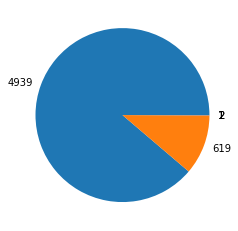

In [4]:
#1.  ¿Cuál es la frecuencia de cada una de las categorías de la columna sex?
x = archivo_csv['sex_'].value_counts()
plt.figure()

plt.pie(x, labels= x)
plt.show()

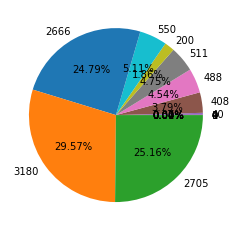

In [23]:
# 2.¿Cuál es el porcentaje de nulos por columna? 
y = archivo_csv.isnull().sum()

plt.figure()

plt.pie(y, labels= y, autopct='%1.2f%%')
plt.show()


In [18]:
# 3. ¿Cuál es número total de valores únicos de cada una de las columnas categóricas del dataframe?
archivo_csv.describe(include= 'object').T.reset_index()

,index,count,unique,top,freq
0,case_number,6113,6113,2018.06.25,1
1,type,6110,8,Unprovoked,4438
2,country,6074,201,USA,2200
3,area,5706,791,Florida,1025
4,location,5626,4020,"New Smyrna Beach, Volusia County",162
5,activity,5603,1484,Surfing,966
6,name,5914,5118,male,511
7,sex_,5564,6,M,4939
8,age,3448,156,17,154
9,time,2934,366,Afternoon,183


In [31]:
df_3_unique = pd.DataFrame(archivo_csv.describe(include= 'object').T.reset_index())
df_3_unique        

,index,count,unique,top,freq
0,case_number,6113,6113,2018.06.25,1
1,type,6110,8,Unprovoked,4438
2,country,6074,201,USA,2200
3,area,5706,791,Florida,1025
4,location,5626,4020,"New Smyrna Beach, Volusia County",162
5,activity,5603,1484,Surfing,966
6,name,5914,5118,male,511
7,sex_,5564,6,M,4939
8,age,3448,156,17,154
9,time,2934,366,Afternoon,183


In [51]:
# x = df_3_unique[["index","unique"]] --> diccionario?
x_x = df_3_unique[["index"]]
x_x

AttributeError: 'list' object has no attribute 'unique'

In [46]:
y = df_3_unique[["unique"]]
y

,unique
0,6113
1,8
2,201
3,791
4,4020
5,1484
6,5118
7,6
8,156
9,366


In [40]:
# nombre_cols= [x.columns]
# nombre_cols = ['index', 'unique']

TypeError: float() argument must be a string or a number, not 'NoneType'

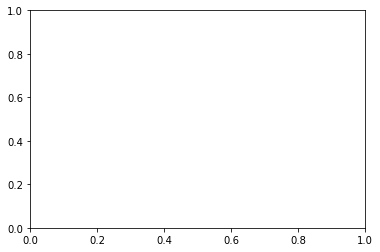

In [72]:
plt.figure()

plt.bar(x, y)
plt.show()

In [77]:
#4. Filtrad los datos para quedarnos solo con los datos de USA.¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? 
# Muestra solo los que hayan ocurrido del 2000 en adelante

df_usa = df[df["country"] == "USA"]
df_usa.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...


In [96]:
#filtramos los años de ataques a partir de 2000 (solo en USA)
df_usa_2000 = df_usa[df_usa["year"] > 2000.0]
df_usa_2000.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...


In [97]:
num_ataques_usa2000 = df_usa_2000.value_counts()
num_ataques_usa2000.head(2)

case_number   year    type        country  area     location                                                  activity                      name               sex_  age  time   species_               href                                                                          
2001.04.05    2001.0  Unprovoked  USA      Florida  Bethune Beach, south of New Smyrna Beach, Volusia County  Standing alongside surfboard  Jason Bartholem    M     26   14h45  "small shark"          http://sharkattackfile.net/spreadsheets/pdf_directory/2001.04.05-Bartholem.pdf    1
2012.06.26.c  2012.0  Unprovoked  USA      Florida  Juno Beach, Palm Beach County                             Swimming                      Nickolaus Bieber   M     6    19h00  possibly a bull shark  http://sharkattackfile.net/spreadsheets/pdf_directory/2012.06.26.c-Bieber.pdf     1
dtype: int64

In [107]:
df_num_ataques_usa2000 = num_ataques_usa2000.reset_index()
df_num_ataques_usa2000.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,0
0,2001.04.05,2001.0,Unprovoked,USA,Florida,"Bethune Beach, south of New Smyrna Beach, Volu...",Standing alongside surfboard,Jason Bartholem,M,26,14h45,"""small shark""",http://sharkattackfile.net/spreadsheets/pdf_di...,1
1,2012.06.26.c,2012.0,Unprovoked,USA,Florida,"Juno Beach, Palm Beach County",Swimming,Nickolaus Bieber,M,6,19h00,possibly a bull shark,http://sharkattackfile.net/spreadsheets/pdf_di...,1


TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

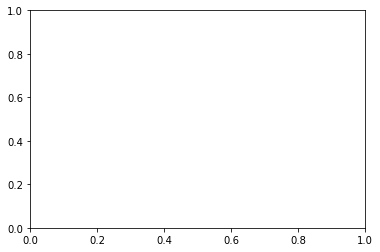

In [108]:
#reset indxex para pasar las columnas index de year a index y luego ya se puede definiar las variables x, y.
#bar gráfico.

# x : años
# y :numero de ataques


#x
x = df_num_ataques_usa2000["year"].unique   #años en los que ocurren los ataques


#y
y = df_num_ataques_usa2000.count()          #cantidad de ataques por año

plt.figure()
plt.bar(x,y)
plt.show()

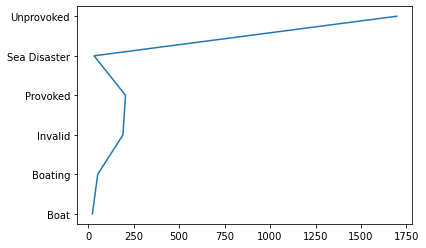

In [139]:
# 4. Parte 2. En función del tipo, ¿cuántos ataques de tiburones de cada tipo hubo en USA? Muestra los resultados en un gráfico de línea.
# df_usa.head(2)

df_type_count = df_usa.groupby("type").count().reset_index()
df_type_count.head()

x = df_type_count['year']                   #esto no parecen los años
y = df_type_count["type"]

plt.figure()
plt.plot(x,y)
plt.show()



In [11]:
#5. Ataques tiburones en España a lo largo del tiempo.
# ¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

df_spain = df[df["country"] == "SPAIN"]
df_spain.head(2)

In [ ]:
#número de ataques en España a lo largo del tiempo
df_spain["case_number"].count()

In [143]:
#número de ataques en España a partir del 2000
df_spain_2000 = df_spain[df_spain["year"] > 2000.0]
df_spain_2000.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href
82,2017.09.16.b,2017.0,Unprovoked,SPAIN,Canary Islands,Gran Canaria,Body surfing,male,M,13,NaN,"Porbeagle, 1.5 m",http://sharkattackfile.net/spreadsheets/pdf_di...
98,2017.08.26.b,2017.0,Invalid,SPAIN,Castellón,Grao de Moncofa,Swimming,female,F,11,Midday,Shark involvement questionable,http://sharkattackfile.net/spreadsheets/pdf_di...


In [153]:
#número de ataques en España a partir deñ 2000
df_spain_2000["case_number"].count()

16

In [ ]:
#gráfico
# x : años
# y : nº de casos por tipo


In [ ]:
#En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de línea.
df_type_spain = df_spain.groupby("type").count().reset_index()
df_type_spain.head(2)

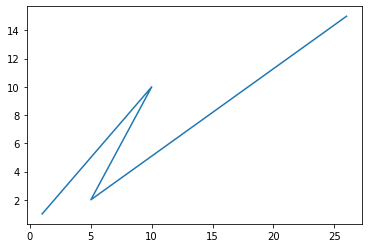

In [160]:
x1_1 = df_type_spain["year"]
y1_1 = df_type_spain["species_"]

plt.figure()
plt.plot(x1_1,y1_1)
plt.show()